<h2><center><strong>Uniquant Market Prediction -  Team B</strong></center></h2>
<h3><center><strong>Introduction</strong></center></h3>
In the financial market, fluctuations are expected irrespective of the investment strategy used. However, investors still find ways to estimate their overall returns. Factors including the investment types have different risks and give different returns, which significantly impact the stability and volatility. There are many computer-based algorithms and models in financial market trading used to predict returns.
Ubiquant Investment (Beijing) Co., Ltd, one of the leading domestic quantitative hedge fund based in China was established in 2012. To drive quantitative financial market investment, Ubiquant relies on international talents in math and computer science together with cutting-edge technology. With this strategy, Ubiquant is committed to creating long-term stable returns for investors.
<h3><center><strong> Objectives and Problem Definition</strong></center></h3>
The goal of Ubiquant Market Competition is to predict the future return of an asset given historical features. All the elements in the dataset are anonymized. 
The dataset comprises 1211 different time steps and 3500 assets. Some investments do not have records at certain time steps, with the least having only two records. 
Setting up a prediction model out of this is challenging, as 27 percent of information is missing. Filling the gaps with an interpolation algorithm is not sufficient as well. Preliminary EDA shows the targets or forward returns are normally distributed and reveals no linear correlation with features. Some features are linearly correlated.
The team addressed this problem in three ways. First, using regression to predict the target from the 300 recorded features. Second, as forecast challenge where time is important, and third, aggregating the two techniques to form ensemble learning.  
<h3><center><strong>Metrics</strong></center></h3>
Evaluation of the model is based on the mean of the Pearson correlation coefficient for each time ID. The submistion included the use of a time-series API, to ensure the model does not peek forward in time. An error could occur if the submission includes nulls or infinities and the submissions that only include one prediction value would receive a score of -1.
Since this is a forecasting competition with an active training phase,there will be a second period where models will be run on a private dataset withheld for the duration of the competition.
<h3><center><strong>Methodology</strong></center></h3>
The first task of this challenge was modelling a minimum viable product that would predict the targets based on existing features. To maximise the number of model tests, team members agreed to work on this task in person and make a Kaggle submission. The ultimate model selected was based on metric scores, complexity, computational demands, and difficulty.
<h4><strong>Random Forest Regressor - Rhodasi</strong></h4>
A Random Forest Regressor was implemented using the Keras module in Tensorflow. The model is often utilised for classification and regression problems with multiple features and larger dataset. More so Random Forest Regressor is robust to outliers, noise and variance. The model was computationally demanding and we were unable to train it on the complete dataset. A submission was made with the model was trained by running several training loops with batches of 30 percent. This resulted in a score of 0.021. This was as expected as an RFR is a decision tree regressor and it's performance is determined by how much data it is fed.

<h4><strong>Vector Autoregression - Lali</strong></h4>

<h4><strong>A DNN with Leaky ReLu - Mercelina</strong></h4>
Deep learning models are able to automatically learn arbitrary and complex mappings from inputs to outputs.
A deep learning model with LeakyReLU activation was used as an MVP. During training, loss optimization was Adam with a learning rate of 0.003. The training was conducted for 5 epochs and gave a score of 0.142.  Maintaining 5 epochs with a learning rate of 0.001 improved the score to 0.143. Adjusting the learning rate to 0.001, and training epochs to 20, a score of 0.146 was attained. Further increase in epochs to 30, lead to increase in validation loss due to overfiting, and the score reduced to 0.144. Using early stopping and saving the best model did not improve the model score from 0.146.
<h4><strong>A Dense Convolution Neural Network - Dennies</strong></h4>
A convolution layer as a feature engineering technique was used to reduce dimensionality. A single channel image of 1 by 300 dimensions is the input to the network. The convolution layer has a 3 by 3 filter, and max pooling layers with a stride of 2. The output of the layer is then fed into a dense layer. The convolution layer reduces the input dimensions while retaining key features.
The data set was split into five folds, and which were then further subdivided into the training and validation set. During training, early stopping was used to decrease over-fitting when validation loss rose. The root mean square of the training set was 0.91 and the Pearson score was 0.139 on the leaderboard.
Considering the computational demands and low performance despite various optimization techniques, the model was discarded for the other fronted models.
<h3><center><strong>Selected Model - Ensemble Based DNN</strong></center></h3>
Team members evaluated their MVPs and agreed on working with Arnold’s model based on dense neural network and ensemble learning. Leaderboard score was 0.149, outperforming the other suggested models. The model employs ensemble techniques, which allow for improvement. The team worked on the model to improve its performance and achieved a maximum score of 0.153.
<h3><center><strong>Limitations</strong></center></h3>
The major challenges faced by the team were limited compute resources and time constraints. Random and frequent kernel crashes because of memory exhaustion were experienced during the training. Large amount of missing data and noise made it difficult to build an ideal model.
The next section breaks down into the EDA, feature engineering, model training and submission

## **Exploratory Data Analysis**
We explore the structure of the data, its characteristics, and relationships

In [1]:
import os

# exploratory data analysis
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import cycle
from scipy import stats
import seaborn as sns

# model training
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops

# feature engineering


plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

### **Load the Dataset**.
<p> The pickle file is adapted from <a href="https://www.kaggle.com/lonnieqin/ubiquant-market-prediction-half-precision-pickle"><strong>Lonnie</strong></a> which is a reduced version of the original dataset. This speeds up loading and minimizes memory exhaustion</p>

In [2]:
# train df
train = pd.read_pickle('../input/ubiquant-market-prediction-half-precision-pickle/train.pkl')

# convert the train as float16

train = train.astype('float16')

In [3]:
train.head(5)

,investment_id,time_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,target
0,1.0,0.0,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,0.965820,1.230469,...,-1.095703,0.200073,0.819336,0.941406,-0.086792,-1.086914,-1.044922,-0.287598,0.321533,-0.300781
1,2.0,0.0,0.811035,-0.514160,0.742188,-0.616699,-0.194214,1.771484,1.427734,1.133789,...,0.912598,-0.734375,0.819336,0.941406,-0.387695,-1.086914,-0.929688,-0.974121,-0.343506,-0.231079
2,6.0,0.0,0.394043,0.615723,0.567871,-0.607910,0.068909,-1.083008,0.979492,-1.125977,...,0.912598,-0.551758,-1.220703,-1.060547,-0.219116,-1.086914,-0.612305,-0.113953,0.243652,0.568848
3,7.0,0.0,-2.343750,-0.011871,1.875000,-0.606445,-0.586914,-0.815918,0.778320,0.299072,...,0.912598,-0.266357,-1.220703,0.941406,-0.608887,0.104919,-0.783203,1.151367,-0.773438,-1.064453
4,8.0,0.0,0.842285,-0.262939,2.330078,-0.583496,-0.618164,-0.742676,-0.946777,1.230469,...,0.912598,-0.741211,-1.220703,0.941406,-0.588379,0.104919,0.753418,1.345703,-0.737793,-0.531738


The train dataframe has 300 anonymized features labelled f_0 to f_299, investments and targets at different times.

In [4]:
#  extracting the features of the df
n_features = 300
features = [f'f_{i}' for i in range(n_features)]

#### **Are there any nulls? What are the total number of observations?**
<a id="1"></a>

In [5]:
#  check the shape and NaNS

obs = train.shape[0]
print(f"number of observations: {obs}")
print(f"NaNs in the dataframe? {str(train.isnull().values.any())}")

number of observations: 3141410
NaNs in the dataframe? False


### **Investments & Observation size (Time)**
<a id='time_investments'></a>

All the investments have a total of 3141410 observations from the [cell](#1) above. We investigate if these observations are distributed equally among the investments. 

In [6]:
# the number of investment ids, and max available time ids
# the investment_id with highest number of timesteps

obs_by_asset = train.groupby(['investment_id'])['target'].count()
# number of unique investments
assets = train.investment_id.nunique()
time_steps =train.time_id.nunique()
print(f"number of investments: {assets}\nmax time steps: {time_steps}")
print(f"highest observation window: investement_id {np.argmax(obs_by_asset)} with {np.max(obs_by_asset)}")
print(f"lowest observation window: investement_id {np.argmin(obs_by_asset)} with {np.min(obs_by_asset)}")


number of investments: 2788
max time steps: 1211
highest observation window: investement_id 2286 with 3576
lowest observation window: investement_id 1334 with 2


There  are 3579 investments. Investment 1334 has the lowest observation time of 2 whereas investment 2027 has highest observation time of 1211.
Investment have different observation times and therefore the dataset is not balanced.
Some of the investment_id's are underepresented in the datset. We may attempt to remove them to see if our model's accuracy and/or predictive power will improve

#### **Quartile Distribution**

In [7]:
# finding the quartiles of the time steps 

obs_by_asset.quantile([0.25,0.5,0.75])



0.25     790.75
0.50    1060.50
0.75    1172.00
Name: target, dtype: float64

50% of the investments have time steps between 0 and 683 for lower quartile and 1131 and 1211 for Q3.
The rest are between median value of 1009 and Q3

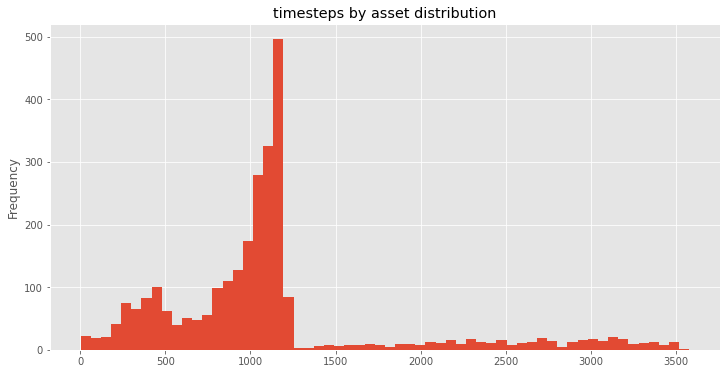

In [8]:
# visual rep of the sizes of observations

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
obs_by_asset.plot.hist(bins=60)
plt.title("timesteps by asset distribution")
plt.show()

The sample size of each investment is equal to the time steps used in recording the data. As computed in the previous cell, the majority of the investments have observations between 800 and 1200
<a id="2"></a>

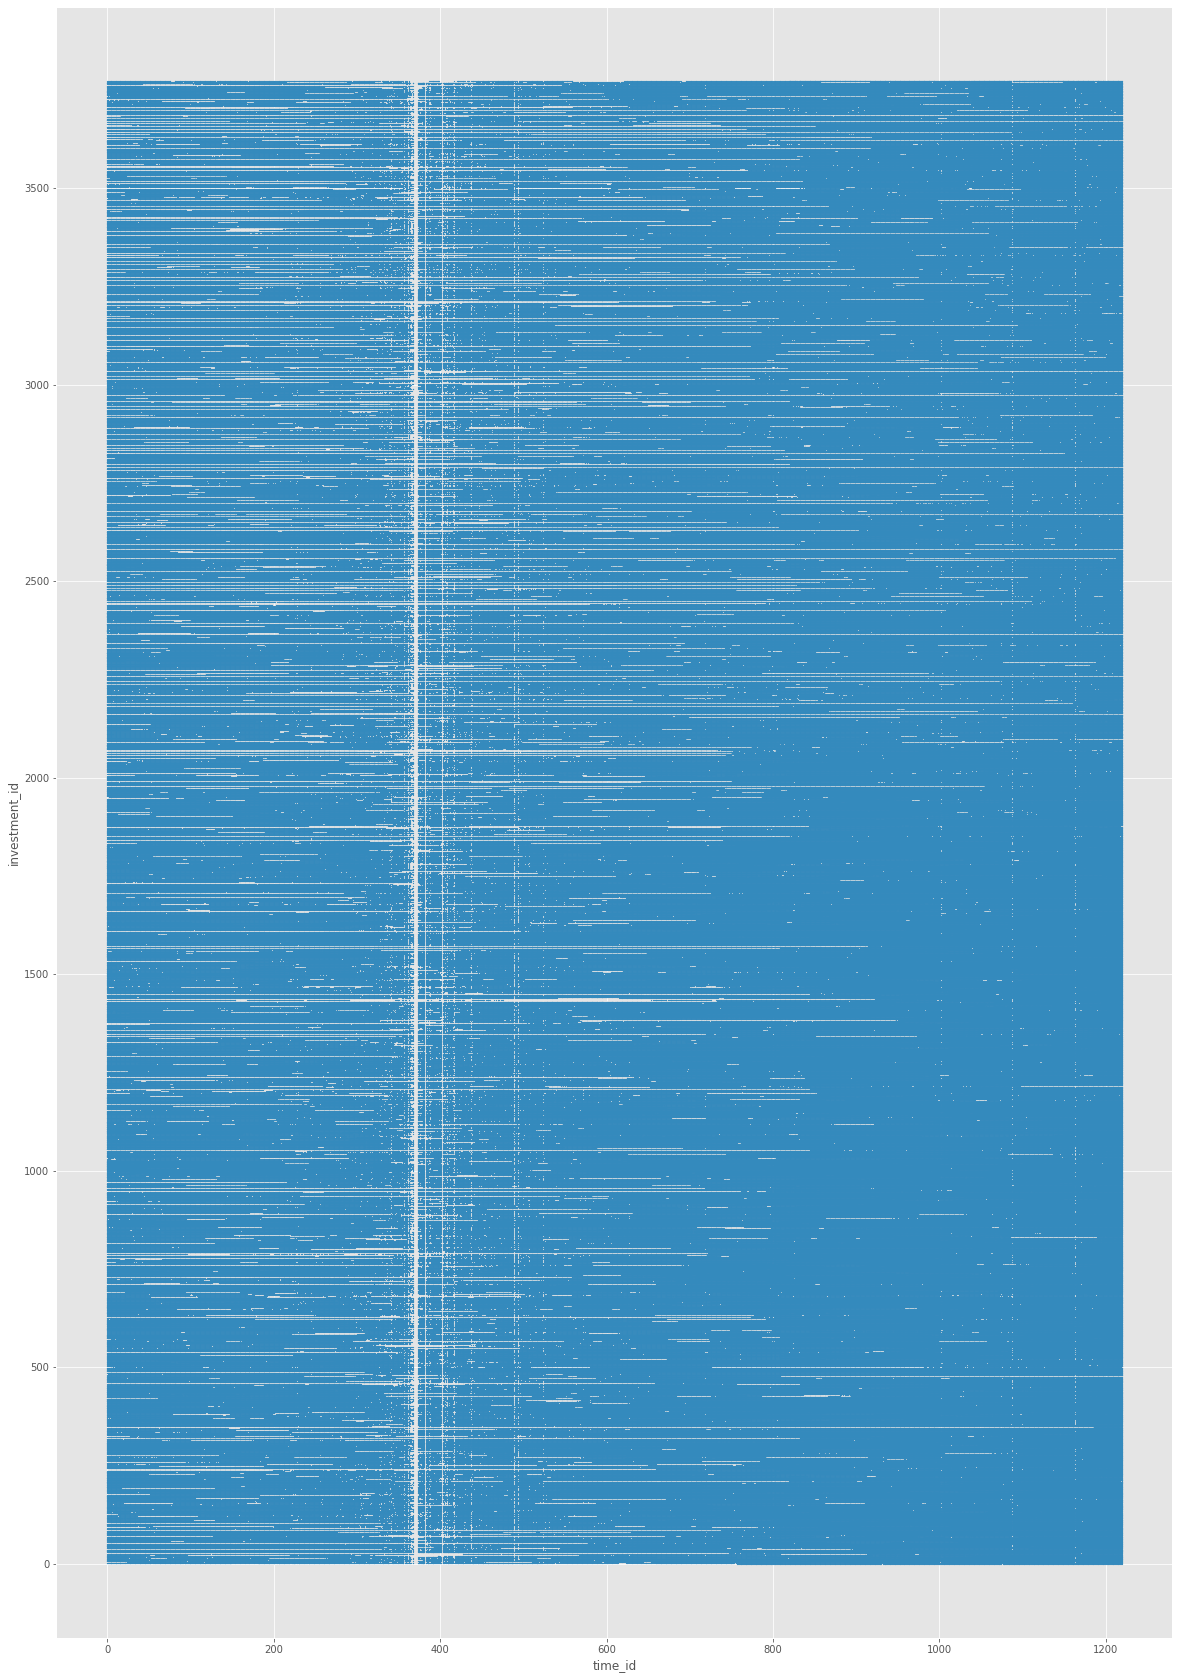

In [9]:
# we investigate the distribution of each investment observation across the min and the max time steps

train[['investment_id', 'time_id']].plot.scatter('time_id', 'investment_id', figsize=(20, 30), s=0.5)
plt.show()

The white patches shows missing data at the specific time id. The are some vertical white lines which are common across the various observations. These are probably holidays, missing or removed data.

### **Targets && Investment Ids**
<a id='targets_investments'></a>

We average the targets of each investment across the observation window. For each investment also, the standard deviation of targets is calculated.

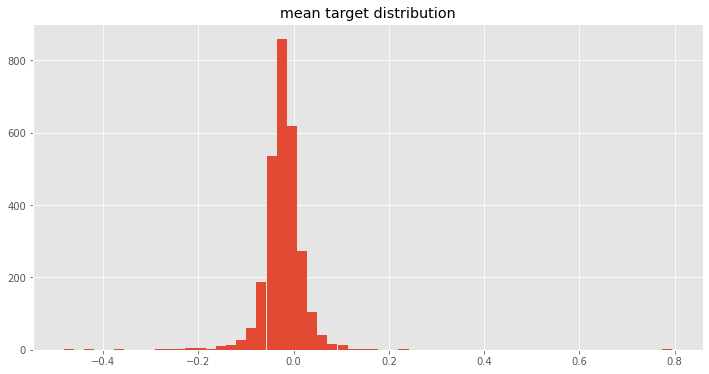

Mean of mean target: -0.02245


In [10]:
# The mean of the targets of each asset
mean_target = train.groupby(['investment_id'])['target'].mean()

# mean of the mean of each investment
mean_mean_target =mean_target.mean()
kde = stats.gaussian_kde(mean_target)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
mean_target.hist(bins=60)
plt.title("mean target distribution")
plt.show()

print(f"Mean of mean target: {mean_mean_target: 0.5f}")

The distribution of targets is normal with a mean of almost zero. There are no outliers causing long tails, and can be used for modelling without further preprocessing

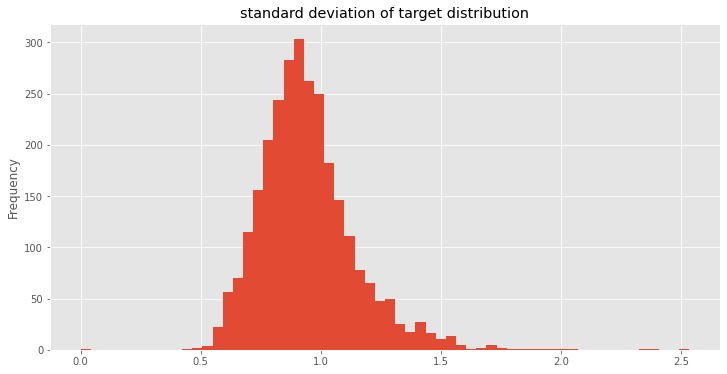

Mean of std target:  0.94421


In [11]:
# the standard deviation of the tragets of each investment id

sts_target = train.groupby(['investment_id'])['target'].std()

# the mean of the std of the targets
mean_std_target = np.mean(sts_target)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sts_target.plot.hist(bins=60)
plt.title("standard deviation of target distribution")
plt.show()

print(f"Mean of std target: {mean_std_target: 0.5f}")

The targets have a mean standard deviation of 0.9. Approximately 95% of the investments have a mean std between 0.5 and 1.5. There are a few data points with high STD

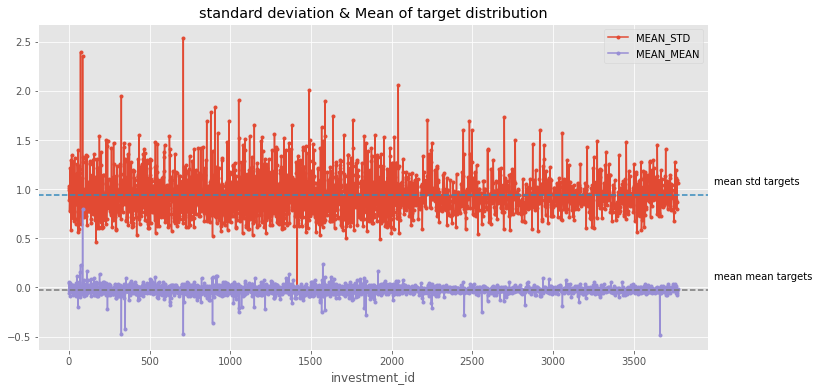

In [12]:
#  A plot of the std and the mean of each each asset
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sts_target.plot(style='.-',color=next(color_cycle),legend=True,label='MEAN_STD')
ax.axhline(y=mean_std_target,linestyle='--',color=next(color_cycle))
ax.text(4000,mean_std_target+0.1,'mean std targets')

ax.text(4000,mean_mean_target+0.1,'mean mean targets')
mean_target.plot(style='.-',color=next(color_cycle),legend=True,label='MEAN_MEAN')
ax.axhline(y=mean_mean_target,linestyle='--',color=next(color_cycle))
plt.title("standard deviation & Mean of target distribution")
plt.show()

The plot of mean of asset targets is about zero, and confirm distribution of targets as normal. There a few cases of spiking in STD, and probably the reason for outliers in the distribution plot.

### **Time and Targets**
In this section, we are utilizing the observation size of each investment from [Investments & Time](#time_investments) and [Investment Targets](#targets_investments) to visualize the relationship of the time and the targets. We use Seaborn Joint plot library to compare how the mean and standard deviation of each investment target vary across time

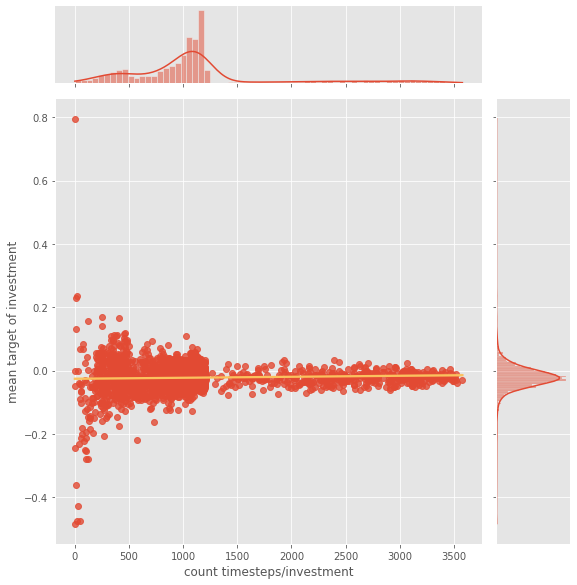

In [13]:
#  obs by target is a count of the time steps per investment id
#  A plot of mean of targets for each investment id

ax = sns.jointplot(x=obs_by_asset.values, y=mean_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':next(color_cycle)}})
ax.ax_joint.set_xlabel('count timesteps/investment')
ax.ax_joint.set_ylabel('mean target of investment')
plt.show()

The mean is constant for all the time ids. 

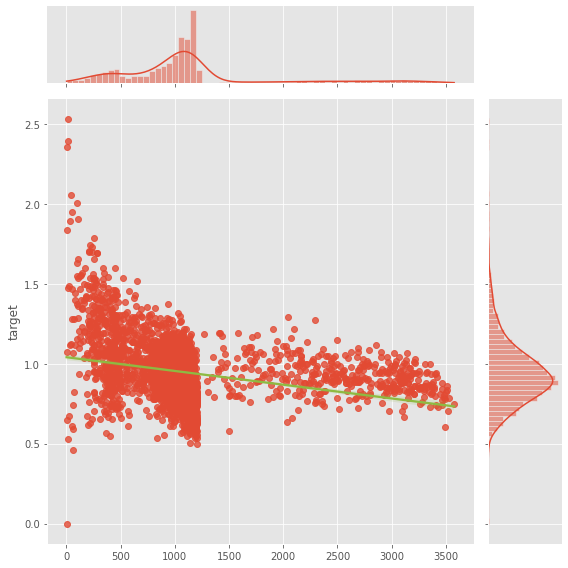

In [14]:
#  the count of investment time steps against mean std of each investment

qx = sns.jointplot(x=obs_by_asset.values, y=sts_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':next(color_cycle)}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('std target')
plt.show()

Time affects the mean standard deviation of the targets. It's obvious that the standard deviation reduces with increasing time steps
This is in contrast to the mean which is constant through the observation space.

#### **Is there any correlation between time and targets?**

In [15]:
#  we find the correlation of the time id and the targets

r = np.corrcoef(train.groupby('time_id')['investment_id'].nunique(), train.groupby('time_id')['target'].mean())[0][1]

print(f"Correlation of number of assets by target: {r:0.3f}")

Correlation of number of assets by target: -0.214


The coefficient is negative, and almost zero.Therefore, it can be concluded that there is no correlation.
In the next section, we will plot the mean and std of all the investments at different time windows.

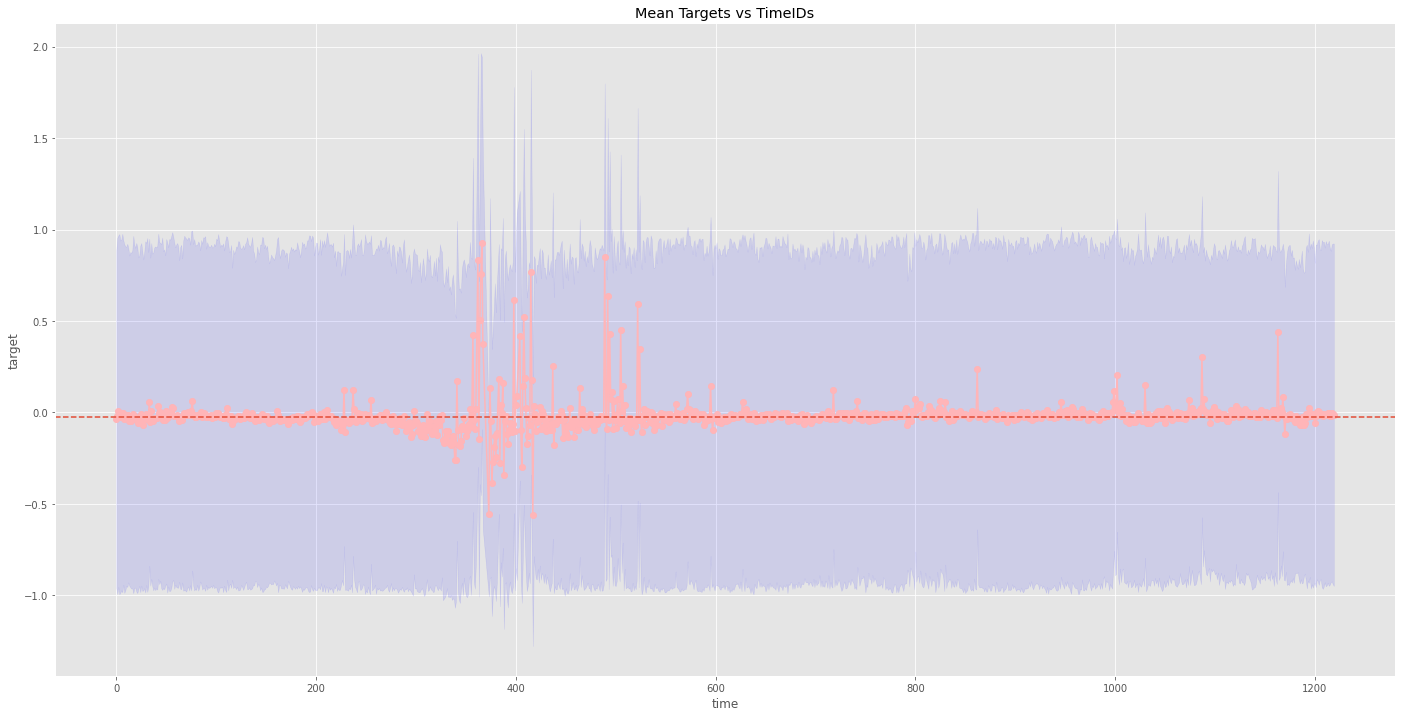

In [16]:
time2target_mean = train.groupby(['time_id'])['target'].mean() #mean of targets at specific time ids
time2target_std = train.groupby(['time_id'])['target'].std()  #std of targets at each time id

_, axes = plt.subplots(1, 1, figsize=(24, 12))

# fills the region between the minimum mean and maximum mean of the investments
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )

plt.plot(
        time2target_mean.index, time2target_mean, "o-", color=next(color_cycle), label="Training score"
    )
plt.axhline(y=mean_mean_target, color=next(color_cycle), linestyle='--', label="mean")
plt.title("Mean Targets vs TimeIDs")
axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

There is spiking in average of the mean between time id 380 to 500 compared to other regions where the target mean appear to be uniform. In this region, probably, there are missing data points for the majority of the investment ids. The white patches in the scatter plot [here](#2) concides with the spikes in this plot. It's the evidence of missing data.

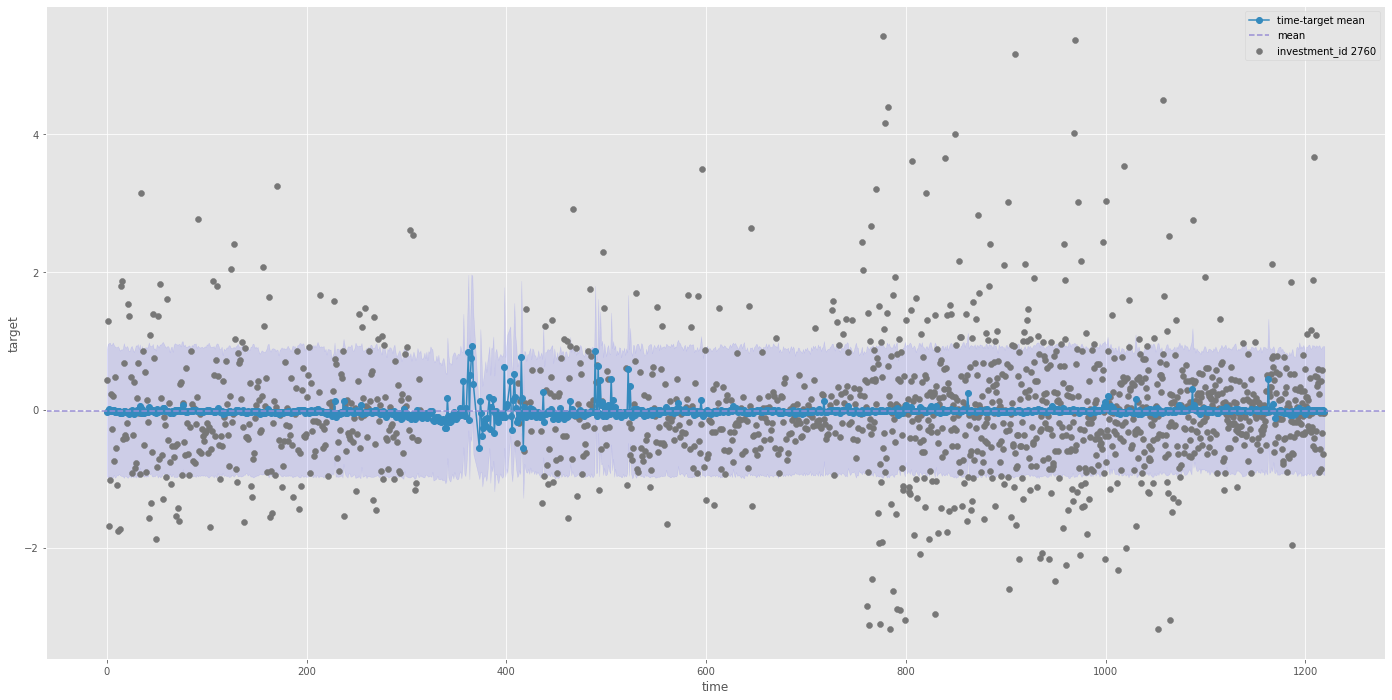

In [17]:
# a random investment id is 
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color=next(color_cycle), label="time-target mean"
    )
plt.axhline(y=mean_mean_target, color=next(color_cycle), linestyle='--', label="mean")

asset = np.random.randint(0,train.investment_id.nunique())
plt.scatter(train[train.investment_id==asset].time_id,
               train[train.investment_id==asset].target, color=next(color_cycle),label=f'investment_id {asset}')
plt.legend()

axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

A random investment is scattered along the mean-target-time plot. For the next section, we inspect specific investments, and how time affects it's targets

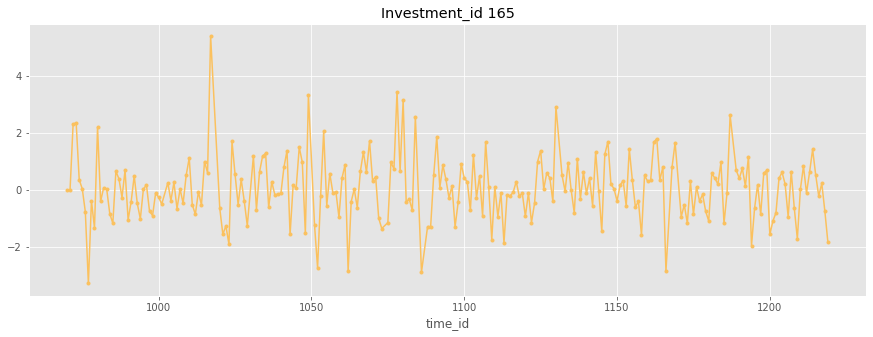

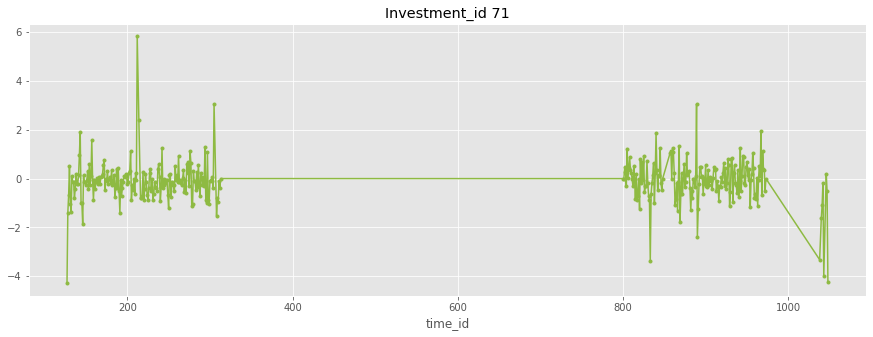

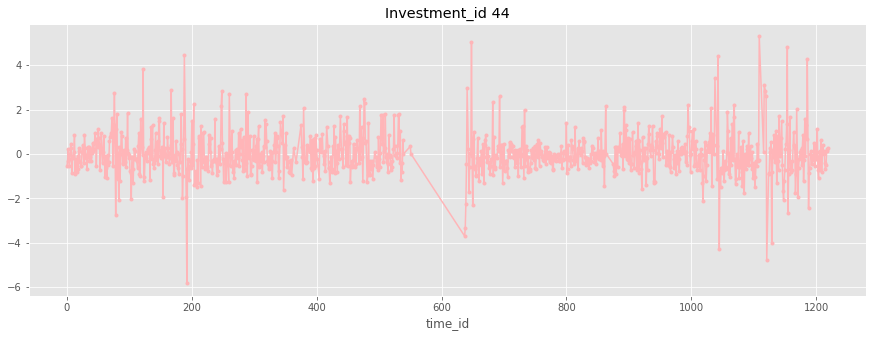

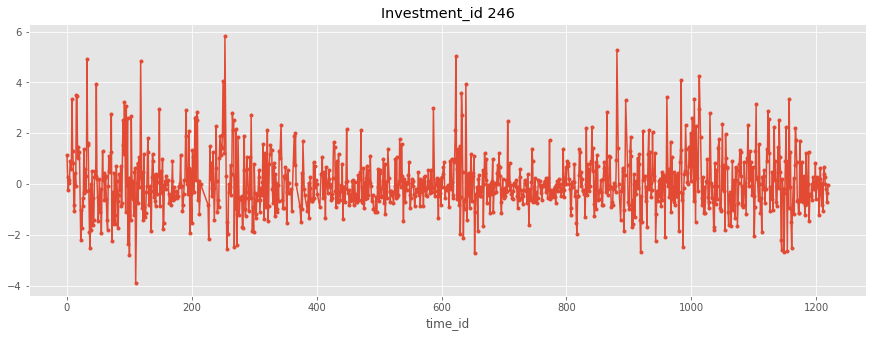

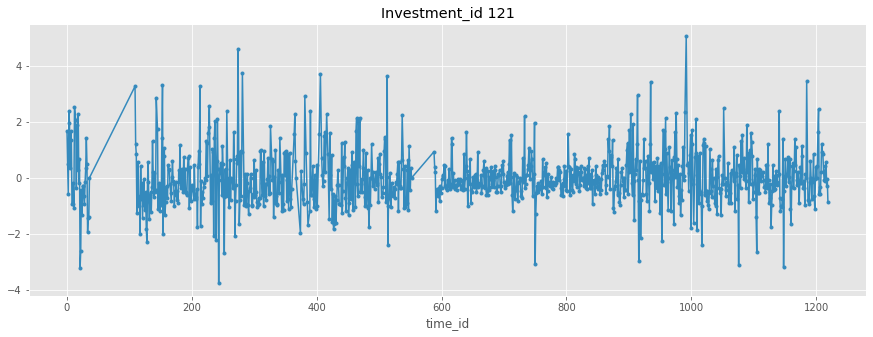

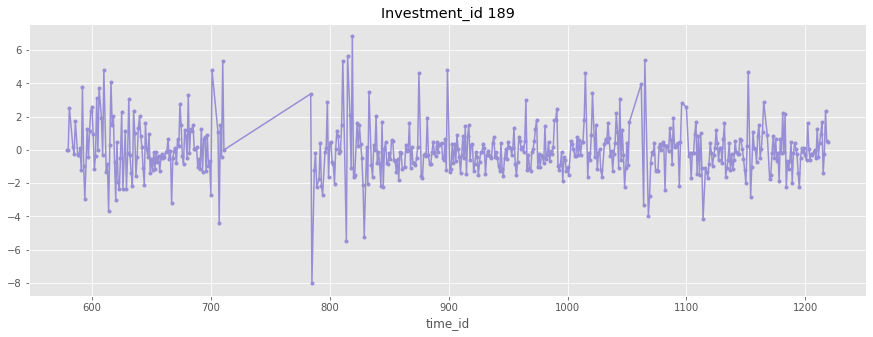

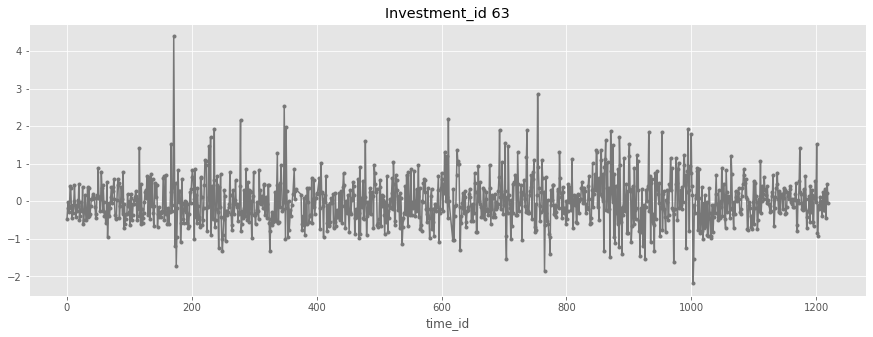

In [18]:
# we are plotting the random investment ids against time ids

random_investments = set(list(np.random.randint(0,300) for num in range(7)))

for investment_id in random_investments:
    d = train.query('investment_id == @investment_id')
    d.set_index('time_id')['target'] \
        .plot(figsize=(15, 5),
              title=f'Investment_id {investment_id}',
              color=next(color_cycle),
              style='.-')
    plt.show()

The plots of random assets indicate missing data and gaps in the observation window. Some of them such as investment 262 has completely no data points. The missing points will impede model performance in the training section. Investment 109 is selected to demonstrate these data gaps

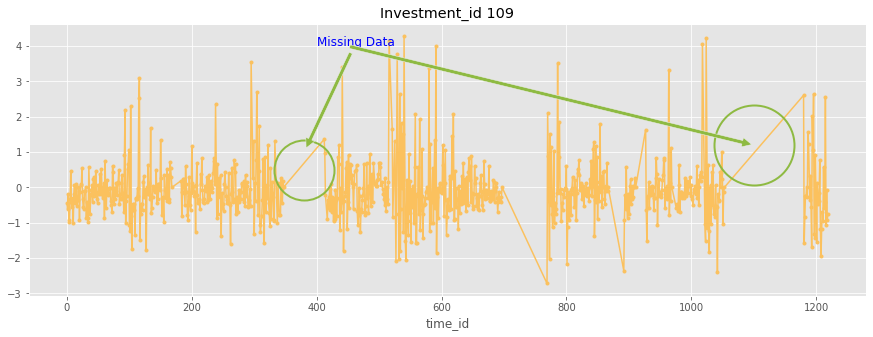

In [19]:
from matplotlib.patches import Ellipse
# a plot of investment_id 59
investment_id=109

fig, ax = plt.subplots(1, 1,figsize=(15, 5))
d = train.query('investment_id == @investment_id')

d.set_index('time_id')['target'] \
    .plot(title=f'Investment_id {investment_id}',
          color=next(color_cycle),
          style='.-')

circle_rad = 30  # This is the radius, in points
circle_2 = 40
color = next(color_cycle)
ax.plot(380, 0.5, 'o',
        ms=circle_rad * 2, mec=color, mfc='none', mew=2)
ax.annotate('Missing Data', xy=(380,1), xytext=(400, 4),
            color='b', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor=color, shrinkB=circle_rad * 0.15))
ax.plot(1100, 1.2, 'o',
        ms=circle_2 * 2, mec=color, mfc='none', mew=2)
ax.annotate('', xy=(1100,1.2), xytext=(450, 4),
            color='b', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor=color, shrinkB=circle_2 * 0.05))

plt.show()

### **Features**

There are 300 features whose values are anonymized. In the first section, we will plot the distribution of 30 features 

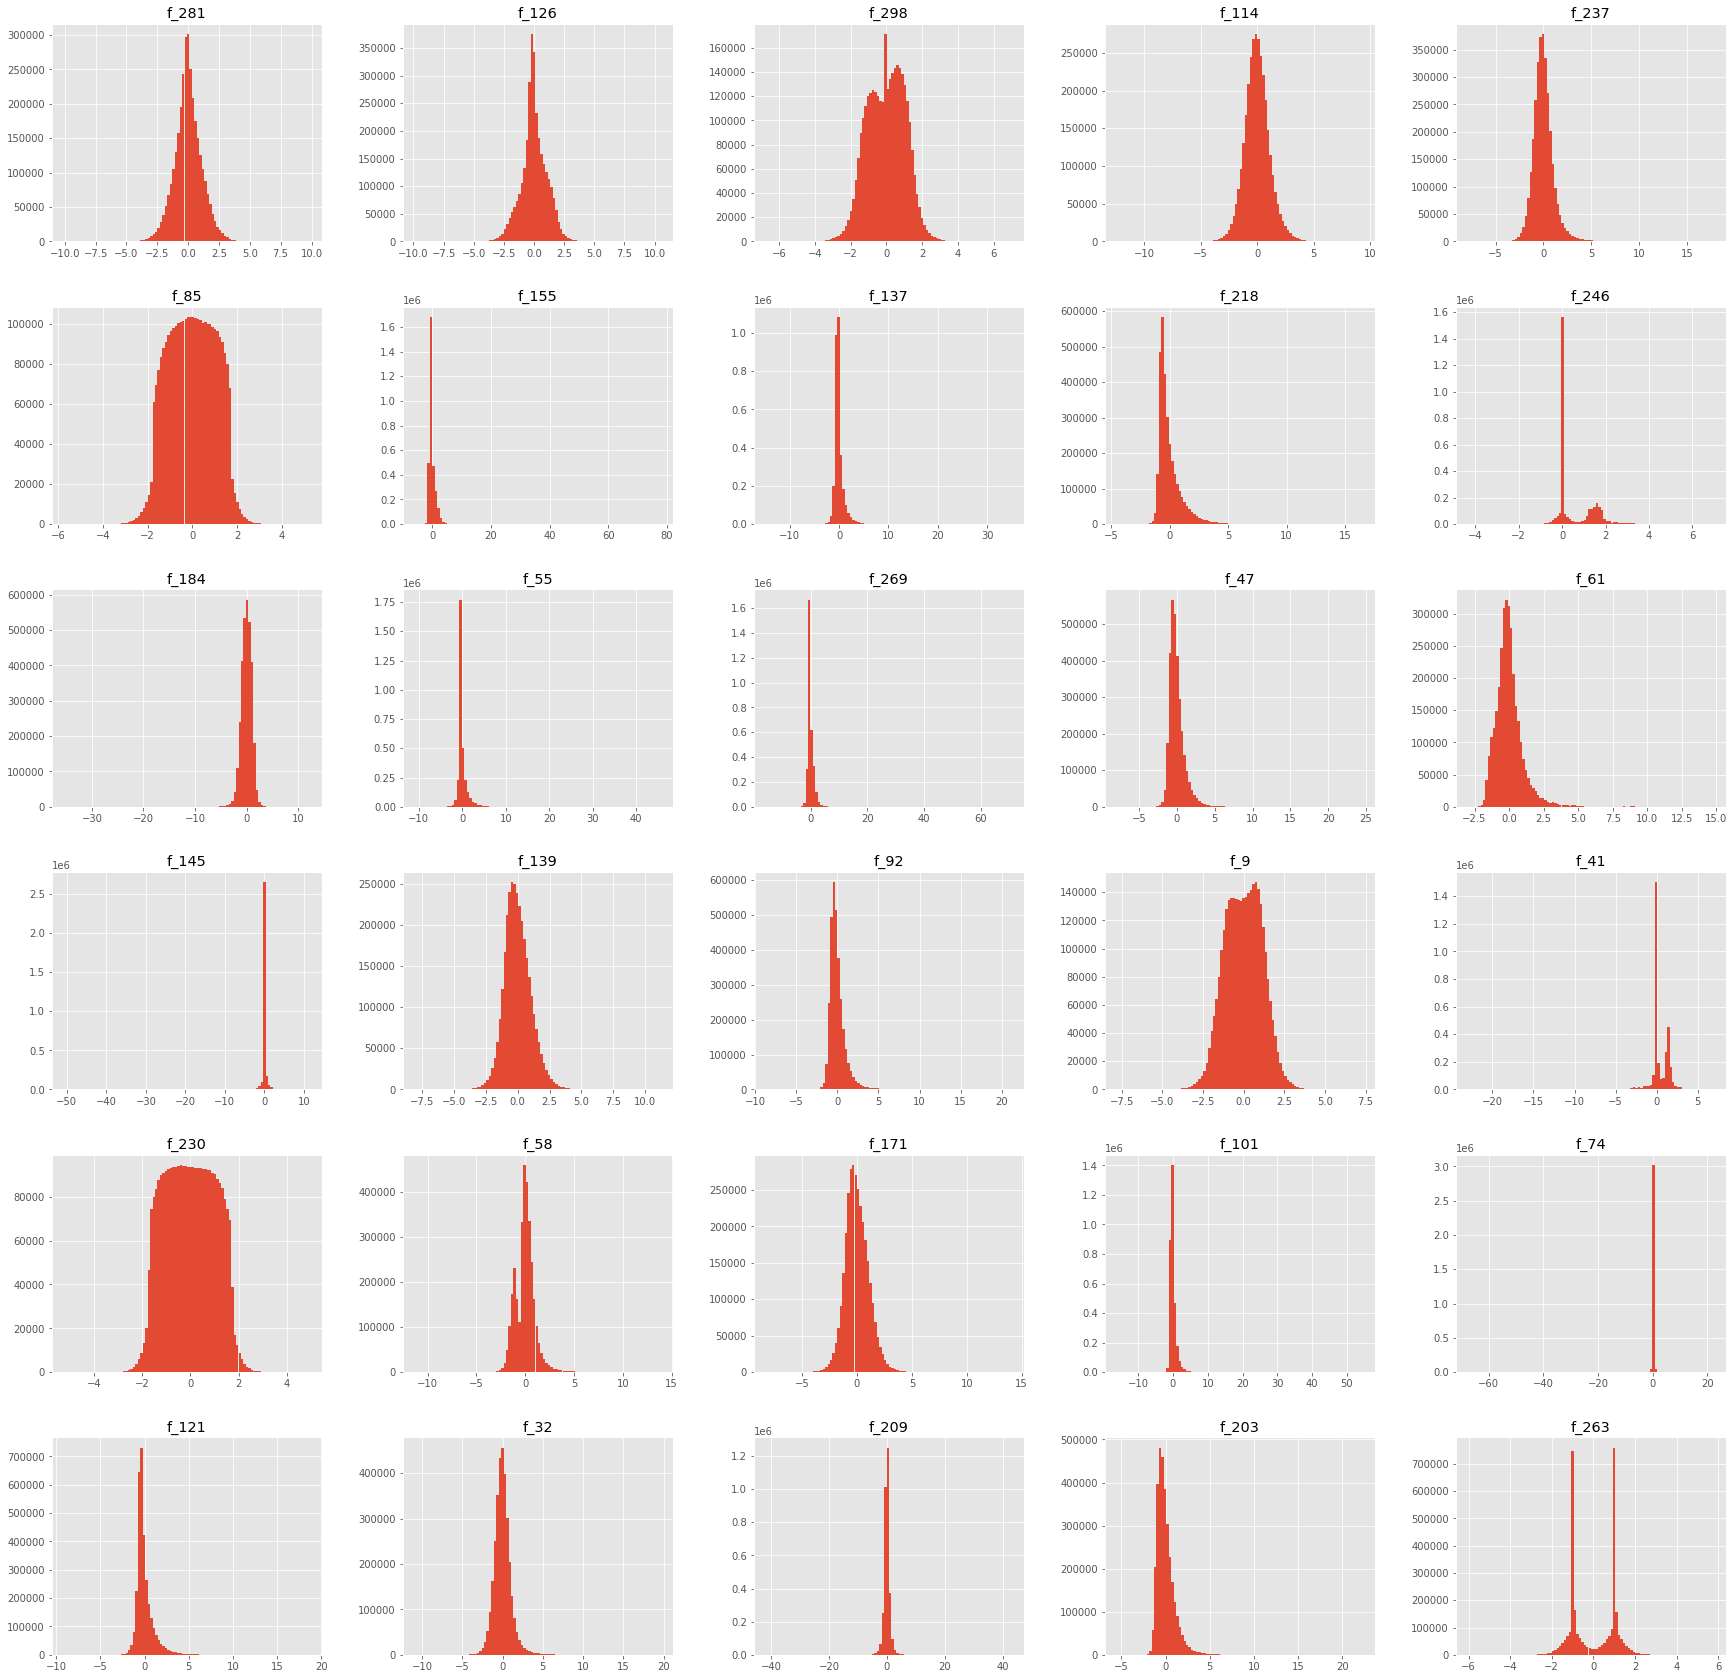

In [20]:
def plot_hist():
    '''Plot distribution of the features extracted randomly
    between 0 & 299
    
    '''

    columns = [f"f_{_}" for _ in np.random.choice(range(299), 30, replace=False)]
    
    train.hist(column = columns, bins = 100, figsize = (30,30))
    plt.show()

    return

plot_hist()


Its difficult to make sense of the histograms of the features. There are some which exhibit a normal distribution, some which are highly skewed with long tails, and multimodal(non-uniform) distribution.
What is conspicous also is missing data points.

#### **features vs targets**
>First, is trending the random features vs targets to check for trends or correlation
<a id='3'></a>

In [29]:
#  Using 3M+ observations will cause memory lag. Observations are sampled

target_sample = train.sample(frac = 0.20)

def target_feature():
    
    """
    This function randomly picks 30 features without replacement,
    and plot against the target.
    """
    
    fig, ax = plt.subplots(6, 5, figsize=(30,30), sharey=True)
    
    axes = [axis for axis in ax.flatten()]
    
    for i, _ in enumerate(np.random.choice(range(299), 30, replace=False)):
        ax_ = axes[i]

        df_ = target_sample[['target',f'f_{_}']]
        ax_.scatter(df_[f'f_{_}'], df_['target'], alpha=0.15)
        ax_.get_xaxis().set_visible(False)
        ax_.get_yaxis().set_visible(False)
        ax_.axis('off')
        plt.text(
            0.1,
            0.9,
            f'f_{_}',
            horizontalalignment='left',
            verticalalignment='top',
            transform = ax_.transAxes)
        del df_
    plt.show()

# target_feature()

The scatter plots appear as noise, and there seems to be no visible trends among the features and targets. We are then going to compute the correlation of the features and targets.

In [30]:
# correlation of features && targets

correlation = target_sample[['target']+features].corr()

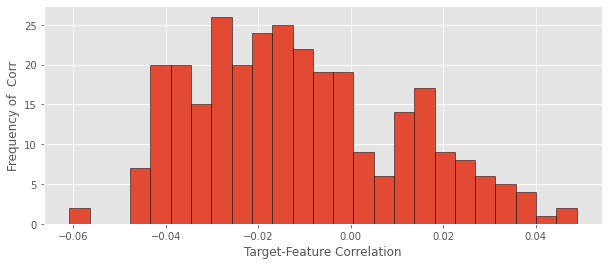

In [31]:
# 
fig, ax = plt.subplots(1,1,figsize=(10, 4))

plt.hist(correlation["target"][1:], edgecolor = "black", bins = 25)
ax.set_ylabel("Frequency of  Corr")
ax.set_xlabel("Target-Feature Correlation")
plt.show()

There seems to be a no strong linear correlation between the features and the target. Max positive corr is 0.04, and the min is -0.06. Feature-target plots [here](#3) had shown no trend  between the targets and features.

/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


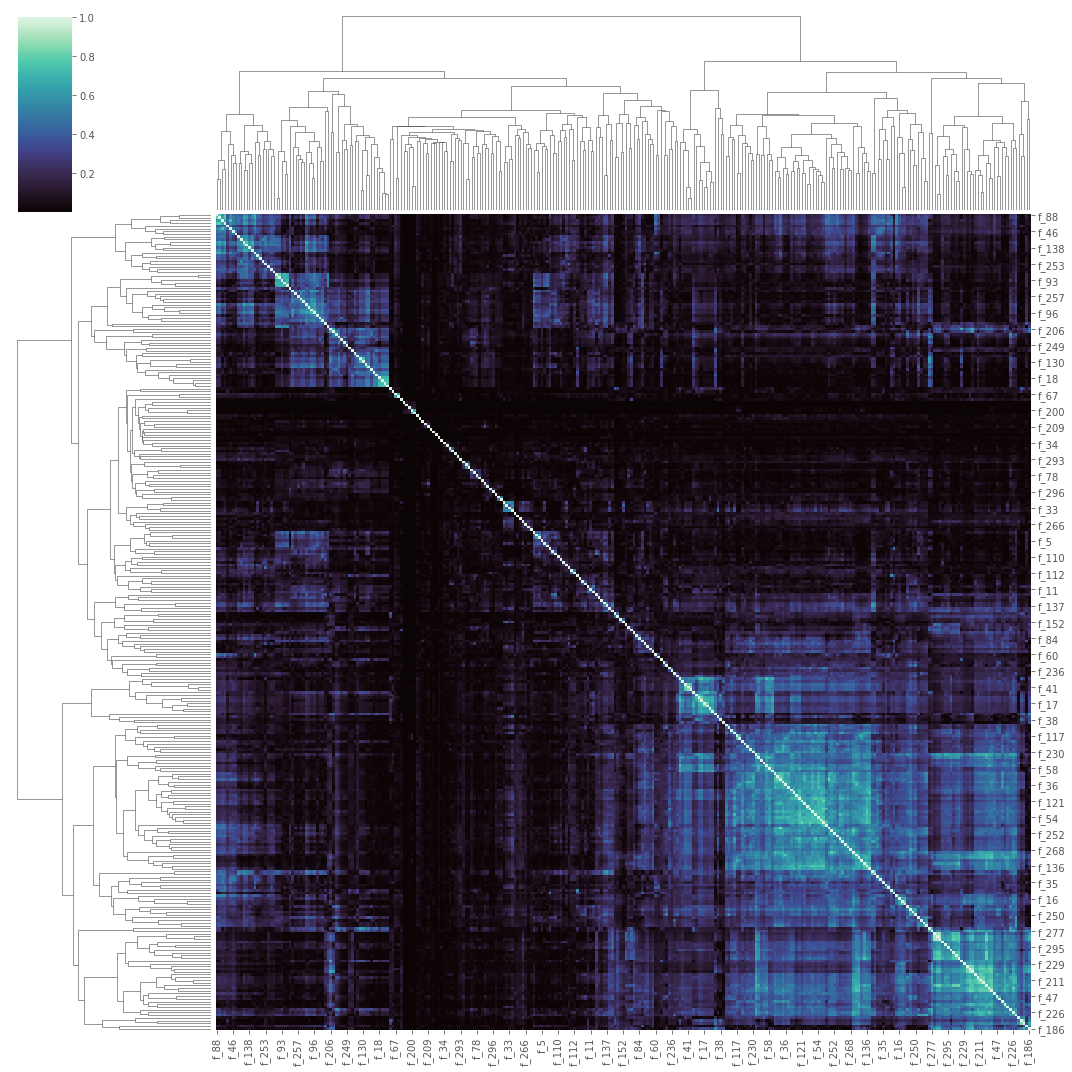

In [32]:
sns.clustermap(abs(correlation), figsize = (15,15), cmap = "mako");

Looking at the linear correlation between the fx features, we can see that there are several highly correlated features. Highly correlated features often contain the same information and we could drop some features without information loss.

##### **Feature importance using correlations**

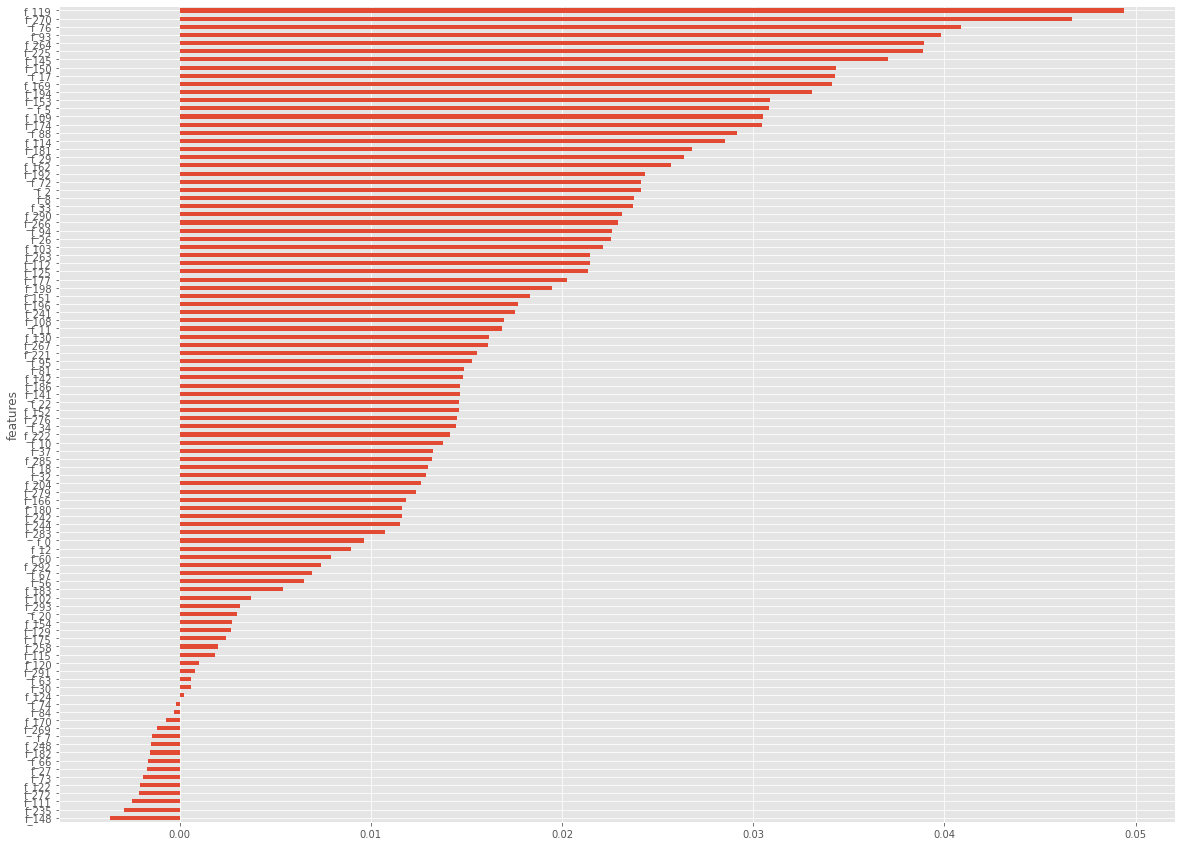

In [25]:
#Check if any of the features are at least moderately correlated with the target using pearson's r <-0.5 or >0.5
correlations=[]
feature_columns=[]

for col in train.columns[2:-1]:
    coef = np.corrcoef(train['target'], train[col])[0][1]
    correlations.append(coef)
    feature_columns.append(col)
    
target_feature_coeff=pd.concat([pd.Series(feature_columns), pd.Series(correlations)],axis=1)

#rename the columns in our correlations_target df
target_feature_coeff['features']=target_feature_coeff[0]
target_feature_coeff['coeff']=target_feature_coeff[1]
target_feature_coeff.drop([0,1], axis=1)

#visualize the importance of features based on pearson's r
i = target_feature_coeff['features']
feat_importances = pd.Series(correlations, index=i)
feat_importances.nlargest(100).plot(kind='barh', figsize=(20, 15)).invert_yaxis()
plt.show()

### **Checking whether the data is static or not**
We are testing whether the data is stationary or not using the Augmented Dickey-Fuller test (ADF Test). Stationarity refers to a series which doesn't exhibit seasonality or a trend. The data properties such as mean, variance, covariance are independent and not a function of time.
ADF is conducted with the following assumptions:
* `Null Hypothesis` - *Data is non Stationary*
* `Alternate Hypothesis` - *Data is stationary*

Null hypothesis is adopted if the test static is less than the critical value, and p-value is less than 0.05


In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries,asset):
    print (f'Results of Dickey-Fuller Test: Investment_id{asset} \n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,end='')
    print('')

For investment of id 70, we reject null hypothesis for alternate hypothesis. The time series is stationary from the p-value which is less than the significance level of 0.05, and the ADF statistic is less than any critical values

In [27]:
#  we perform ADF tests for more random investment ids

for i in range(5):
    asset = np.random.randint(0,train.investment_id.nunique())
    d = train.query('investment_id == @asset')
    d = d.set_index('time_id')['target']
    
    
    try:
        adf_test(d,asset)
    except:
        print('err')
        pass

Results of Dickey-Fuller Test: Investment_id1443 

Test Statistic                  -24.495493
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1193.000000
Critical Value (1%)              -3.435843
Critical Value (5%)              -2.863966
Critical Value (10%)             -2.568061
dtype: float64
Results of Dickey-Fuller Test: Investment_id1348 

err
Results of Dickey-Fuller Test: Investment_id1989 

Test Statistic                -1.731479e+01
p-value                        5.526655e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.570000e+02
Critical Value (1%)           -3.456054e+00
Critical Value (5%)           -2.872853e+00
Critical Value (10%)          -2.572799e+00
dtype: float64
Results of Dickey-Fuller Test: Investment_id2522 

Test Statistic                 -28.367802
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used

Random investments tested above satisfy the ADF criteria for time stationarity. It can be concluded therefore that the assets in this dataset are stationary.

## **Feature Engineering**

This section outlines steps taken to transform the data in an attempt to improve model performance. The feature engineering tasks are based on exploratory data analysis section. [TIME SERIES ANALYSIS WITH PANDAS](https://ourcodingclub.github.io/tutorials/pandas-time-series/#resampling), [Fitting time series regression models](https://people.duke.edu/~rnau/timereg.html), and [6 Powerful Feature Engineering Techniques For Time Series Data (using Python)](https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/) were referenced to guide the process.

### **Create Simulated DateTime Index**

Most of the time series data transformations require a valid DateTime or PeriodTime index. Because the data does not specify one, the time_id column was used to create a dummy variable for Time indexing. It assumes a continous time-period with daily frequency.

In [36]:
def create_datetime(df,index):
    """ Takes the time_id column of the dataframe to simulate a datetime object
    
     Args: a dataframe and the name of the index with the time-like data

     Returns: dataframe with a datetime index
    
    """
    period=max(df[index]) - min(df[index]) + 2
    dti=pd.date_range(start="2000-01-01", periods=period, freq='D')
    times=[time for time in range(period)]
    data_index_dict=dict(zip(times, dti))
    time_id=df[index].unique()
    df['date_time']=df[index]
    df['date_time'].replace(data_index_dict, inplace=True)
    df['date_time'] =  pd.to_datetime(df['date_time']) 
  

target_sample['time_id'] = target_sample['time_id'].astype('int16')
create_datetime(target_sample, 'time_id')
target_sample = target_sample.set_index('date_time')
#train.head()
gc.collect()

0

### **Autocorrelation**

In [37]:
def random_autocorrelation_plot (data_frame, time_interval):
    '''
    plots the autocorrelation of 5 random features in a dataframe defined by a time interval
    Args: 
    data_frame: pandas dataframe
    time_interval: pandas datetime format e.g 'W','1w', '2w' 'Y','1y' etc - check pandas.DateTime documentation for full list
    Returns: A graph of autocorrelation over specified time lag
    '''
    import random as r
    random= [r.randint(0,300) for i in range(5)]
    for i in random:
        df = data_frame[f'f_{i}']
        pd.plotting.autocorrelation_plot(df.resample(time_interval).median(), label=(f'feature {i}'))
        plt.title(f"Autocorrelation of feature f_{i} at interval {time_interval}")
    plt.show()

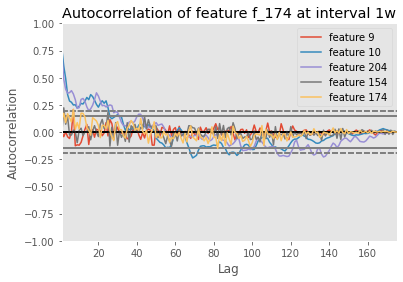

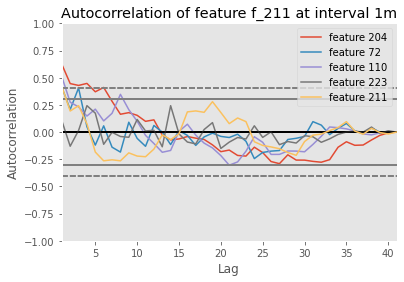

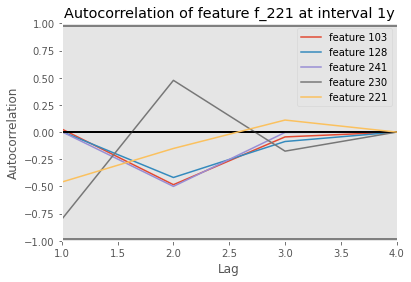

In [38]:
#Examine how autocorrelation of random features changes with size of our simulated lag times
random_autocorrelation_plot (target_sample, '1w')

random_autocorrelation_plot (target_sample, '1m')

random_autocorrelation_plot (target_sample, '1y')

### **Data Transformations**

Because the data has negative values, we were unable to use some popular mathematical transofrmations used for time-series data e.g log and squaring.

#### **Min-Max Scaling**
The model performance dropped from 0.149 to 0.137 with scaled data

In [39]:
from sklearn.preprocessing import MinMaxScaler
#Normalize the data using Min-Max scaling

sample_x = ['investment_id'] + [f'f_{i}' for i in range(300)]

scaler = MinMaxScaler()

scaled= scaler.fit_transform(target_sample[sample_x])
gc.collect()

scaled



array([[0.9175 , 0.7363 , 0.4028 , ..., 0.3745 , 0.4954 , 0.1458 ],
       [0.373  , 0.702  , 0.3684 , ..., 0.3801 , 0.3809 , 0.1343 ],
       [0.10284, 0.721  , 0.3667 , ..., 0.4214 , 0.5645 , 0.1157 ],
       ...,
       [0.9956 , 0.7065 , 0.4556 , ..., 0.2969 , 0.6733 , 0.1333 ],
       [0.6143 , 0.733  , 0.3125 , ..., 0.3892 , 0.3013 , 0.1333 ],
       [0.8066 , 0.756  , 0.402  , ..., 0.457  , 0.575  , 0.1298 ]],
      dtype=float16)

#### **Lagged Dataframe**
The dataframe was lagged with a shift value of 1. Using a plot of autocorrelation lagging the data had the same effect as resampling. No competition submission was made on lagged data alone

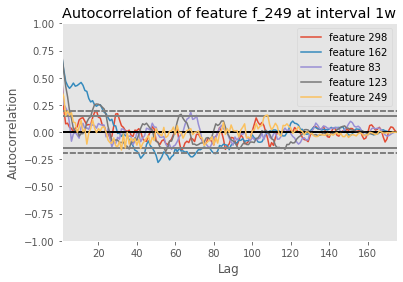

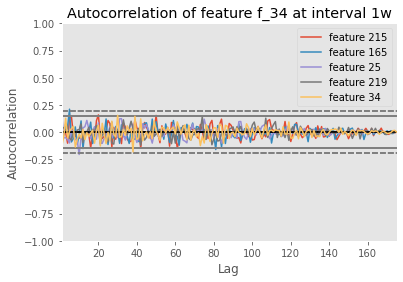

In [40]:
#Copy the dataframe
df_lagged = target_sample.copy()

# del target_sample

#trailing_window_size = 2
df_lagged = pd.concat([df_lagged.shift(1)], axis=1)
df_lagged = df_lagged.fillna(0) #filling with 0's appears to have less of an effect on reducing model performance than mathematical interpolation
df_lagged.head()
gc.collect()

#compare original and lagged data with weekly resampling to check for any change
random_autocorrelation_plot (target_sample, '1w')

random_autocorrelation_plot (df_lagged, '1w')

#### **Differenced Data**
The dataframe was changed so the one-step difference in data was used across both feature and target. This is a method used to make data stationary. Predicition must be made on differenced data and the predictions inverted. We were unable to utilise this as the test_df had no corresponding time-id column to use for setting a DateTime index.

Submiting a model trained on differenced data produced a score of 0.138 which was a drop from 0.149.

In [41]:
def inverse_diff(actual_df, pred_df):
    '''
    Transforms the differentiated values back
    Args:
        actual dataframe: Values of the columns, numpy array of floats 
        predicted dataframe: Values of the columns, numpy array of floats 
    Returns:
        Dataframe with the predicted values
    '''
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[col].replace(actual_df[col].iloc[-1] + df_res[str(col)].cumsum())
    return df_res

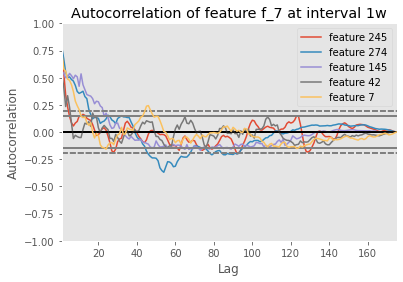

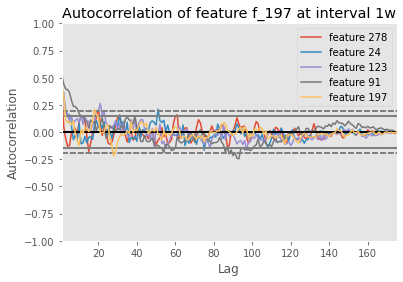

In [42]:
#create a dataset from the differences per increment and pad the first row with 0's
differenced_data= target_sample.diff(axis = 0, periods = 1)
differenced_data=differenced_data.fillna(0)
differenced_data.head()
#del(differenced_data)

#Visualise change in autocorration after differencing
random_autocorrelation_plot (target_sample, '1w')

random_autocorrelation_plot (differenced_data, '1w')

#### Using a lagged and differenced dataframe resulted in a score of  -0.027

### **Resampling the Data**
This would result in a smaller dataframe and utilise medians across a 7 time-step lag. The theory was to reduce noise without losing variation. The autocorrelation plot is smoother but stil variable. Using resampled data gave a score of -0.008


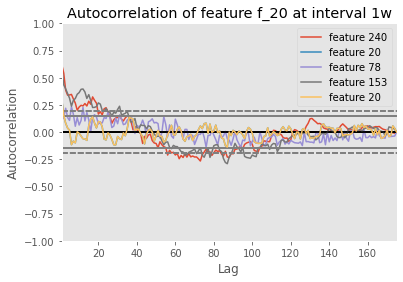

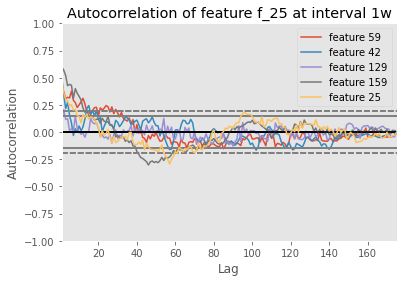

In [43]:
#Resample dataframe by averaging to period=7 
for column in target_sample.columns:
    resampled_train=target_sample
    resampled_train[column]=resampled_train[column].resample('W').median()
    resampled_train[column]=resampled_train[column].interpolate(method ='linear', limit_direction ='backward')

#Compare the autocorrelation in the new dataframe with original
random_autocorrelation_plot (target_sample, '1w')

random_autocorrelation_plot (resampled_train, '1w')

### **Principal Component Analysis**
The goal is to reduce the dimensionality of features fed into the neural network.

In [44]:
# installing and importing the dependencies
!pip install pca
from pca import pca

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=3e3eb33efae1b0d17f5aa852a2f6f02342672dd8bedce7b2fed9a3a724012416
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [45]:
# pca
def dim_red(df):
    """ This function extracts the principal components of the features of the data sets
    """
    features = [f'f_{i}' for i in range(300)]
    df_ = df[features]
    
    pca()
    pca_model = pca(n_components=0.98) # explained variance 90%
    results = pca_model.fit_transform(df_)
    
    del df_
    
    return results,pca_model

In [46]:
#  the function obtains the main principal components
target_sample = train.sample(frac = 0.10)

results,pca_model = dim_red(target_sample)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [98.0%] explained variance using the [300] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [250] that covers the [98.00%] explained variance.
[pca] >The PCA reduction is performed on the [300] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[250]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [47]:
results.keys()

dict_keys(['loadings', 'PC', 'explained_var', 'variance_ratio', 'model', 'scaler', 'pcp', 'topfeat', 'outliers', 'outliers_params'])

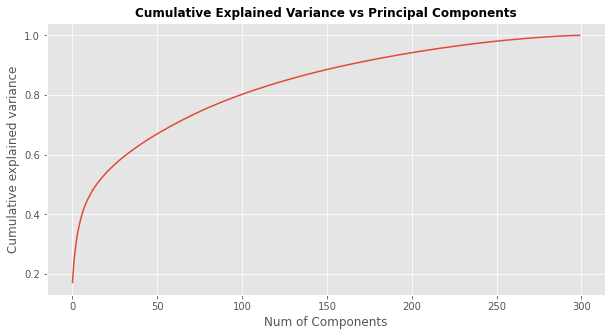

In [48]:
#plot the scree plot to show the components with the most variance in the data set
plt.figure(figsize=(10,5))
plt.title('Cumulative Explained Variance vs Principal Components',fontweight='bold',fontsize=12)
plt.plot(np.cumsum(results['variance_ratio']))
plt.xlabel('Num of Components')
plt.ylabel('Cumulative explained variance')
plt.show()

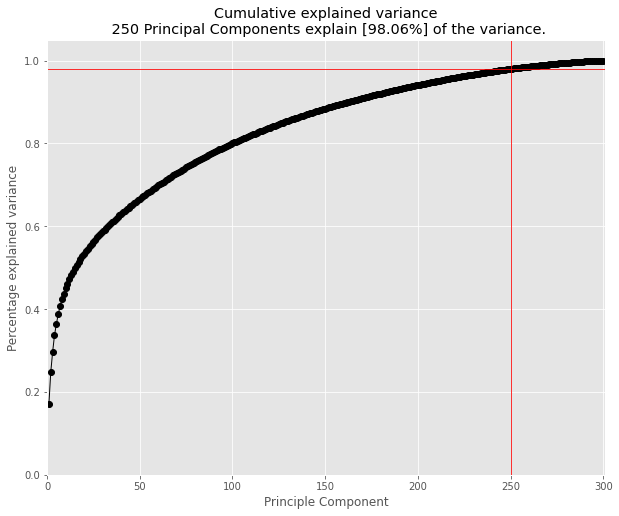

<Figure size 432x288 with 0 Axes>

In [49]:
# plot components/variance
%matplotlib inline
pca_model.plot(figsize=(10,8))
plt.tight_layout()
plt.show()

From the plots above, 250 components has an explained variance of 98 percent.The principal components are loaded into the model as inputs. The results from the model after PCA is -15.3, and therefore not suitable for this challenge. PCA reduces 50 features only, so it doesn't solve the problem of dimensionality.

### **Feature Engineering Summary**

More tests are needed to examine the data inorder to apply feature extraction and selection criteria to improve model performance. We were unable to leverage many feature engineering tools particularly the [scikit](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html) library  due to computational limits arising from the size of the dataframe.

In [50]:
# free memory from dataframes in the previous section
del target_sample
del scaled
del resampled_train
del differenced_data
del df_lagged


## **Model Training**
Our baseline model is a Dense Neural Network that uses the swish non-linearity function. Swish is a smooth, non-monotonic function. The data is split into folds with StratifiedKFold from Sklearn, and later split into train and validation sets during training. The four models are trained on this data by looping over the folds. StratifiedKFold cross-validation object is a variation of KFold that returns stratified folds made by preserving the percentage of samples for each class.

The best weights of each model is saved during training and appended into a list for inference. For each fold, the model is trained for  30 epochs. Validation loss is monitored, and early stopping used used to avoid overfitting. Compute resources are optimized by deleting train and validation dataframes after every fold of training.
Validation set is used to evaluate model performance after training. The metrics are Root mean square and Pearson correlation.

In [3]:
# investment ids
investment_id = train["investment_id"]

# targets
y = train["target"]

# features
train = train.drop(['investment_id','time_id','target'],axis=1)

### **IntegerLookup layer for investment_id**

This is a preprocessing layer which maps integer features to contiguous ranges. During adapt(), the layer will analyze a data set, determine the frequency of individual integer tokens, and create a vocabulary from them.

In [4]:
%%time
#IntegerLookup layer for investment_id 
investment_ids = list(investment_id.unique())
investment_id_size = len(investment_ids) + 1
investment_id_lookup_layer = layers.IntegerLookup(max_tokens=investment_id_size)
investment_id_lookup_layer.adapt(pd.DataFrame({"investment_ids":investment_ids}))

2022-03-06 21:19:37.005133: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-06 21:19:37.166640: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


CPU times: user 339 ms, sys: 29.7 ms, total: 369 ms
Wall time: 613 ms


### **Make Tensorflow Dataset**

In [6]:
#data preparation for loading

def preprocess(X, y):
    return X, y

def make_dataset(feature, investment_id, y, batch_size=1024, mode="train"):
    
    """The function creates a source dataset from input data.
    Apply dataset transformations to preprocess the data.
    Iterate over the dataset and process the elements.
    Iteration happens in a streaming fashion, 
    so the full dataset does not need to fit into memory."""
    
    ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature), y))
    ds = ds.map(preprocess)
    if mode == "train":
        ds = ds.shuffle(4096)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds

def t(a):
  """For testing: generate a float64 tensor from anything."""
  return tf.constant(a, dtype=tf.float64)

def tmean(x, axis=-1):
  """Arithmetic mean of a tensor over some axis, default last."""
  x = tf.convert_to_tensor(x)
  sum = tf.reduce_sum(x, axis=axis)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  return sum / n

def correlationMetric(x, y, axis=-2):
  """Metric returning the Pearson correlation coefficient of two tensors over some axis, default -2."""
  x = tf.convert_to_tensor(x)
  y = math_ops.cast(y, x.dtype)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  xsum = tf.reduce_sum(x, axis=axis)
  ysum = tf.reduce_sum(y, axis=axis)
  xmean = xsum / n
  ymean = ysum / n
  xvar = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis)
  yvar = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)
  cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
  corr = cov / tf.sqrt(xvar * yvar)
  return tf.constant(1.0, dtype=x.dtype) - corr


def correlationLoss(x,y, axis=-2):
  """Loss function that maximizes the pearson correlation coefficient between the predicted values and the labels,
  while trying to have the same mean and variance"""
  x = tf.convert_to_tensor(x)
  y = math_ops.cast(y, x.dtype)
  n = tf.cast(tf.shape(x)[axis], x.dtype)
  xsum = tf.reduce_sum(x, axis=axis)
  ysum = tf.reduce_sum(y, axis=axis)
  xmean = xsum / n
  ymean = ysum / n
  xsqsum = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis)
  ysqsum = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)
  cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
  corr = cov / tf.sqrt(xsqsum * ysqsum)
  # absdif = tmean(tf.abs(x - y), axis=axis) / tf.sqrt(yvar)
  sqdif = tf.reduce_sum(tf.math.squared_difference(x, y), axis=axis) / n / tf.sqrt(ysqsum / n)
  # meandif = tf.abs(xmean - ymean) / tf.abs(ymean)
  # vardif = tf.abs(xvar - yvar) / yvar
  # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - corr + (meandif * 0.01) + (vardif * 0.01)) , dtype=tf.float32 )
  return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - corr + (0.01 * sqdif)) , dtype=tf.float32 )

In [6]:
models = []

#### **Model 1 - baseline model**
The baseline model is a dense layer comprising of ten hidden layers. Swish function introduces non linearity.  Loss optimization is Adam with a learning rate of 0.001, and the performance is evaluated with RMSE. This is common across the models forming the ensemble learning.

In [55]:
%%time

def dnn_baseline_model():
    investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    features_inputs = tf.keras.Input((300, ), dtype=tf.float16)
    
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    investment_id_x = layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    
    feature_x = layers.Dense(256, activation='swish')(features_inputs)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    
    x = layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = layers.Dense(512, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(128, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
    output = layers.Dense(1)(x)
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model = tf.keras.Model(inputs=[investment_id_inputs, features_inputs], outputs=[output])
    model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mse', metrics=['mse', "mae", "mape", rmse, correlationMetric])
    return model

# training the model

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(5, shuffle=True, random_state=42)

for index, (train_indices, valid_indices) in enumerate(kfold.split(train, investment_id)):
    X_train, X_val = train.iloc[train_indices], train.iloc[valid_indices]
    investment_id_train = investment_id[train_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[valid_indices]
    investment_id_val = investment_id[valid_indices]
    train_ds = make_dataset(X_train, investment_id_train, y_train)
    valid_ds = make_dataset(X_val, investment_id_val, y_val, mode="valid")
    model = dnn_baseline_model()
    checkpoint = keras.callbacks.ModelCheckpoint(f"model_{index}", save_best_only=True)
    early_stop = keras.callbacks.EarlyStopping(patience=10)
    history = model.fit(train_ds, epochs=30, validation_data=valid_ds, callbacks=[checkpoint, early_stop])
    model = keras.models.load_model(f"model_{index}")
    models.append(model)
    
    pearson_score = stats.pearsonr(model.predict(valid_ds).ravel(), y_val.values)[0]
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=["mse", "val_mse"]).plot()
    plt.title("MSE")
    plt.show()
    pd.DataFrame(history.history, columns=["mae", "val_mae"]).plot()
    plt.title("MAE")
    plt.show()
    pd.DataFrame(history.history, columns=["rmse", "val_rmse"]).plot()
    plt.title("RMSE")
    plt.show()
    del investment_id_train
    del investment_id_val
    del X_train
    del X_val
    del y_train
    del y_val
    del train_ds
    del valid_ds
    gc.collect()
    break

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Epoch 1/30
2455/2455 [==============================] - 134s 54ms/step - loss: 0.9108 - mse: 0.8314 - mae: 0.6243 - mape: 134279.0781 - rmse: 0.9118 - correlationMetric: 0.8679 - val_loss: 0.8413 - val_mse: 0.8391 - val_mae: 0.6317 - val_mape: 99656.0547 - val_rmse: 0.9160 - val_correlationMetric: 0.8987


2022-03-06 20:30:28.539918: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/30
2455/2455 [==============================] - 118s 48ms/step - loss: 0.8311 - mse: 0.8277 - mae: 0.6232 - mape: 148001.1875 - rmse: 0.9098 - correlationMetric: 0.8556 - val_loss: 0.8391 - val_mse: 0.8364 - val_mae: 0.6304 - val_mape: 139250.9844 - val_rmse: 0.9146 - val_correlationMetric: 0.8904
Epoch 3/30
2455/2455 [==============================] - 120s 49ms/step - loss: 0.8300 - mse: 0.8251 - mae: 0.6219 - mape: 162364.2031 - rmse: 0.9083 - correlationMetric: 0.8443 - val_loss: 0.8382 - val_mse: 0.8355 - val_mae: 0.6303 - val_mape: 134612.6094 - val_rmse: 0.9141 - val_correlationMetric: 0.8855
Epoch 4/30
2455/2455 [==============================] - 115s 47ms/step - loss: 0.8279 - mse: 0.8229 - mae: 0.6212 - mape: 152719.7812 - rmse: 0.9072 - correlationMetric: 0.8358 - val_loss: 0.8364 - val_mse: 0.8346 - val_mae: 0.6288 - val_mape: 160011.3750 - val_rmse: 0.9136 - val_correlationMetric: 0.8817
Epoch 5/30
2455/2455 [==============================] - 121s 49ms/step - loss: 

KeyboardInterrupt: 

#### **Model 2 - dnn_10fold_model**
Three dense layers are added to the baseline model. To avoid noise modelling and overfitting, drop out layers are added after every four dense layers. The baseline metric and training params are retained.


In [7]:
%%time
def dnn_10fold_model():
    investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    features_inputs = tf.keras.Input((300, ), dtype=tf.float16)
    
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    investment_id_x = layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)    
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
   # investment_id_x = layers.Dropout(0.65)(investment_id_x)
   
    
    feature_x = layers.Dense(256, activation='swish')(features_inputs)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    feature_x = layers.Dense(256, activation='swish')(feature_x)
    feature_x = layers.Dropout(0.65)(feature_x)
    
    x = layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = layers.Dense(512, activation='swish', kernel_regularizer="l2")(x)
   # x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation='swish', kernel_regularizer="l2")(x)
  #  x = layers.Dropout(0.4)(x)
    x = layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dropout(0.75)(x)
    output = layers.Dense(1)(x)
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model = tf.keras.Model(inputs=[investment_id_inputs, features_inputs], outputs=[output])
    model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mse', metrics=['mse', "mae", "mape", rmse, correlationMetric])
    return model

# training

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(10, shuffle=True, random_state=42)

for index, (train_indices, valid_indices) in enumerate(kfold.split(train, investment_id)):
    X_train, X_val = train.iloc[train_indices], train.iloc[valid_indices]
    investment_id_train = investment_id[train_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[valid_indices]
    investment_id_val = investment_id[valid_indices]
    train_ds = make_dataset(X_train, investment_id_train, y_train)
    valid_ds = make_dataset(X_val, investment_id_val, y_val, mode="valid")
    model = dnn_10fold_model()
    checkpoint = keras.callbacks.ModelCheckpoint(f"model_{index}", save_best_only=True)
    early_stop = keras.callbacks.EarlyStopping(patience=10)
    history = model.fit(train_ds, epochs=30, validation_data=valid_ds, callbacks=[checkpoint, early_stop])
    model = keras.models.load_model(f"model_{index}")
    models.append(model)
    
    pearson_score = stats.pearsonr(model.predict(valid_ds).ravel(), y_val.values)[0]
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=["mse", "val_mse"]).plot()
    plt.title("MSE")
    plt.show()
    pd.DataFrame(history.history, columns=["mae", "val_mae"]).plot()
    plt.title("MAE")
    plt.show()
    pd.DataFrame(history.history, columns=["rmse", "val_rmse"]).plot()
    plt.title("RMSE")
    plt.show()
    del investment_id_train
    del investment_id_val
    del X_train
    del X_val
    del y_train
    del y_val
    del train_ds
    del valid_ds
    gc.collect()
    break

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


Epoch 1/30
2762/2762 [==============================] - 175s 62ms/step - loss: 0.9178 - mse: 0.8365 - mae: 0.6264 - mape: 93988.0078 - rmse: 0.9146 - correlationMetric: 0.8930 - val_loss: 0.8384 - val_mse: 0.8357 - val_mae: 0.6280 - val_mape: 104908.7969 - val_rmse: 0.9142 - val_correlationMetric: 0.9065


2022-03-06 21:02:48.245521: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/30
2027/2762 [=====================>........] - ETA: 42s - loss: 0.8467 - mse: 0.8406 - mae: 0.6333 - mape: 108253.4375 - rmse: 0.9168 - correlationMetric: 0.8835

KeyboardInterrupt: 

#### **Model 3 - dnn_baseline_model2**
The number of nodes in the dense layers are adjusted compared to the baseline model. Drop out layers introduced after every dense layer. Baseline params are retained.

In [8]:
%%time
def dnn_baseline_model2():
    investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    features_inputs = tf.keras.Input((300, ), dtype=tf.float32)
    
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    investment_id_x = layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dropout(0.5)(investment_id_x)
    investment_id_x = layers.Dense(32, activation='swish')(investment_id_x)
    investment_id_x = layers.Dropout(0.5)(investment_id_x)
    #investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    
    feature_x = layers.Dense(256, activation='swish')(features_inputs)
    feature_x = layers.Dropout(0.5)(feature_x)
    feature_x = layers.Dense(128, activation='swish')(feature_x)
    feature_x = layers.Dropout(0.5)(feature_x)
    feature_x = layers.Dense(64, activation='swish')(feature_x)
    
    x = layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(16, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(1)(x)
    output = tf.keras.layers.BatchNormalization(axis=1)(output)
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model = tf.keras.Model(inputs=[investment_id_inputs, features_inputs], outputs=[output])
    model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mse', metrics=['mse', "mae", "mape", rmse, correlationMetric])
    return model

# training

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(5, shuffle=True, random_state=42)

for index, (train_indices, valid_indices) in enumerate(kfold.split(train, investment_id)):
    X_train, X_val = train.iloc[train_indices], train.iloc[valid_indices]
    investment_id_train = investment_id[train_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[valid_indices]
    investment_id_val = investment_id[valid_indices]
    train_ds = make_dataset(X_train, investment_id_train, y_train)
    valid_ds = make_dataset(X_val, investment_id_val, y_val, mode="valid")
    model = dnn_baseline_model2()
    checkpoint = keras.callbacks.ModelCheckpoint(f"model_{index}", save_best_only=True)
    early_stop = keras.callbacks.EarlyStopping(patience=10)
    history = model.fit(train_ds, epochs=30, validation_data=valid_ds, callbacks=[checkpoint, early_stop])
    model = keras.models.load_model(f"model_{index}")
    models.append(model)
    
    pearson_score = stats.pearsonr(model.predict(valid_ds).ravel(), y_val.values)[0]
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=["mse", "val_mse"]).plot()
    plt.title("MSE")
    plt.show()
    pd.DataFrame(history.history, columns=["mae", "val_mae"]).plot()
    plt.title("MAE")
    plt.show()
    pd.DataFrame(history.history, columns=["rmse", "val_rmse"]).plot()
    plt.title("RMSE")
    plt.show()
    del investment_id_train
    del investment_id_val
    del X_train
    del X_val
    del y_train
    del y_val
    del train_ds
    del valid_ds
    gc.collect()
    break


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Epoch 1/30
2455/2455 [==============================] - 90s 36ms/step - loss: 1.0912 - mse: 0.9732 - mae: 0.6659 - mape: 262096.3594 - rmse: 0.9865 - correlationMetric: 0.9116 - val_loss: 0.8401 - val_mse: 0.8377 - val_mae: 0.6251 - val_mape: 113245.6406 - val_rmse: 0.9152 - val_correlationMetric: 0.8935
Epoch 2/30
1911/2455 [======================>.......] - ETA: 15s - loss: 0.8461 - mse: 0.8438 - mae: 0.6336 - mape: 107527.2109 - rmse: 0.9186 - correlationMetric: 0.8956

KeyboardInterrupt: 

#### **Model 4 - LSTM Model**
For the first 3 models, the problem is considered as a regression problem that can be solved without factoring the effect of time. In this model, LSTM is used to to carry forward important aspects in time which might affect the future outputs. The output of the dense layer to LSTM is normalized to a mean close to zero and standard deviation of one with batch normalization.

In [7]:
%%time
def lstm_model():
    investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    features_inputs = tf.keras.Input((300, ), dtype=tf.float16)
    
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    investment_id_x = layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = layers.Dense(128, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(64, activation='swish')(investment_id_x)
    investment_id_x = layers.Dense(32, activation='swish')(investment_id_x)
    
    feature_x = layers.Dense(256, activation='swish')(features_inputs)
    feature_x = layers.Dense(128, activation='swish')(feature_x)
    feature_x = layers.Dense(64, activation='swish')(feature_x)
    
    x = layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = layers.Dense(256, activation='swish', kernel_regularizer="l2")(x)
    # x = layers.Dense(256, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(128, activation='swish', kernel_regularizer="l2")(x)
    x = layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
    # x = layers.Dense(16, activation='swish', kernel_regularizer="l2")(x)


    x = layers.BatchNormalization(name='batch_norm1')(x)
    x = layers.Dense(256, activation='swish', name='dense1')(x)
    x = layers.Dropout(0.1, name='dropout1')(x)
    x = layers.Reshape((1, -1), name='reshape1')(x)
    x = layers.BatchNormalization(name='batch_norm2')(x)
    x = layers.LSTM(128, return_sequences=True, activation='relu', name='lstm1')(x)
    x = layers.LSTM(16, return_sequences=False, activation='relu', name='lstm2')(x)


    output = layers.Dense(1)(x)
    rmse = keras.metrics.RootMeanSquaredError(name="rmse")
    model = tf.keras.Model(inputs=[investment_id_inputs, features_inputs], outputs=[output])
    model.compile(optimizer=tf.optimizers.Adam(0.001), loss=correlationLoss, metrics=['mse', "mae", rmse, correlationMetric])
    return model

# training


from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(5, shuffle=True, random_state=42)

for index, (train_indices, valid_indices) in enumerate(kfold.split(train, investment_id)):
    X_train, X_val = train.iloc[train_indices], train.iloc[valid_indices]
    investment_id_train = investment_id[train_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[valid_indices]
    investment_id_val = investment_id[valid_indices]
    train_ds = make_dataset(X_train, investment_id_train, y_train)
    valid_ds = make_dataset(X_val, investment_id_val, y_val, mode="valid")
    model = lstm_model()
    checkpoint = keras.callbacks.ModelCheckpoint(f"model_{index}", save_best_only=True)
    early_stop = keras.callbacks.EarlyStopping(patience=10)
    history = model.fit(train_ds, epochs=30, validation_data=valid_ds, callbacks=[checkpoint, early_stop])
    model = keras.models.load_model(f"model_{index}")
    models.append(model)
    
    pearson_score = stats.pearsonr(model.predict(valid_ds).ravel(), y_val.values)[0]
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=["mse", "val_mse"]).plot()
    plt.title("MSE")
    plt.show()
    pd.DataFrame(history.history, columns=["mae", "val_mae"]).plot()
    plt.title("MAE")
    plt.show()
    pd.DataFrame(history.history, columns=["rmse", "val_rmse"]).plot()
    plt.title("RMSE")
    plt.show()
    del investment_id_train
    del investment_id_val
    del X_train
    del X_val
    del y_train
    del y_val
    del train_ds
    del valid_ds
    gc.collect()
    break

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Epoch 1/30
2455/2455 [==============================] - 154s 60ms/step - loss: 1.0028 - mse: 1.6566 - mae: 0.8900 - rmse: 1.2871 - correlationMetric: 0.8701 - val_loss: 0.9244 - val_mse: 0.9853 - val_mae: 0.7090 - val_rmse: 0.9926 - val_correlationMetric: 0.8976


2022-03-06 21:23:36.955740: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/30
2455/2455 [==============================] - 133s 54ms/step - loss: 0.8812 - mse: 1.6059 - mae: 0.8877 - rmse: 1.2672 - correlationMetric: 0.8562 - val_loss: 0.9357 - val_mse: 6.5981 - val_mae: 1.4529 - val_rmse: 2.5687 - val_correlationMetric: 0.8793
Epoch 3/30
2455/2455 [==============================] - 132s 54ms/step - loss: 0.8746 - mse: 1.5248 - mae: 0.8661 - rmse: 1.2348 - correlationMetric: 0.8497 - val_loss: 0.9118 - val_mse: 1.5089 - val_mae: 0.7623 - val_rmse: 1.2284 - val_correlationMetric: 0.8836
Epoch 4/30
2455/2455 [==============================] - 131s 53ms/step - loss: 0.8695 - mse: 1.5192 - mae: 0.8614 - rmse: 1.2326 - correlationMetric: 0.8449 - val_loss: 0.9021 - val_mse: 1.1371 - val_mae: 0.7173 - val_rmse: 1.0664 - val_correlationMetric: 0.8792
Epoch 5/30
2455/2455 [==============================] - 131s 53ms/step - loss: 0.8641 - mse: 1.4845 - mae: 0.8550 - rmse: 1.2184 - correlationMetric: 0.8369 - val_loss: 0.9055 - val_mse: 0.9597 - val_mae: 0.7169

ValueError: Unable to restore custom object of type _tf_keras_metric currently. Please make sure that the layer implements `get_config`and `from_config` when saving. In addition, please use the `custom_objects` arg when calling `load_model()`.

### **Model Summary and Architecture**

In [10]:
#printing the model summary
model = dnn_baseline_model2()
model.summary()

#desplaing the model architecture
#keras.utils.plot_model(model, show_shapes=True)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
integer_lookup (IntegerLookup)  (None, 1)            0           input_5[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 32)        89248       integer_lookup[2][0]             
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 300)]        0                                            
____________________________________________________________________________________________

### **Inference**
The predicted values of the test data is an average of the predictions made by each saved model.

In [11]:
def preprocess_test(investment_id, feature):
   return (investment_id, feature), 0
def make_test_dataset(feature, investment_id, batch_size=1024):
   ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature)))
   ds = ds.map(preprocess_test)
   ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
   return ds
def inference(models, ds):
   y_preds = []
   for model in models:
       y_pred = model.predict(ds)
       y_preds.append(y_pred)
   return np.mean(y_preds, axis=0)

### **Submission**

In [ ]:
#import ubiquant
#env = ubiquant.make_env()
#iter_test = env.iter_test() 
#for (test_df, sample_prediction_df) in iter_test:
#    ds = make_test_dataset(test_df[features], test_df["investment_id"])
#    sample_prediction_df['target'] = inference(models, ds)
#    env.predict(sample_prediction_df) 

# **Results**

The model performance varies from a score 0f -0.153 to 0.153. 

None of the feature engineering transformations improved the model's performance and all resulted in lower scores. 

Performance was improved by ensemble of three DNN models. 

# **Conclusion**

Financial market prediction, even with the advent of machine learning is a complicated process with many pitfalls and challenges. From models that overfit to models that fail to make any meaningful predictions.

Domain knowlege goes a long way into designing a machine learning model that performs consistently, however, deep learning models can be leveraged to make predictions even in the absence of this knowledge. Of course, this limits the developer's ability to manipulate the characteristics of the features, especially in the absence of a definitive time period. After all, financial markets are at their core, time-series data.

**Lessons Learned**

Financial markets are filled with complex relationships and machine learning, especially deep neural networks are an important player in the industry.

For proper time-series forecasting and predictions, a deep understanding of the data and a thorough EDA is neccessary.

Where in doubt, use a DNN; deep learning networks are almost guranteed to pick out relavant information from any type of dataset.
